In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import arviz as az

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
%config InlineBackend.figure_format = 'retina'
RANDOM_SEED = 42
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-viridish")

In [3]:
mu_1 = 102
mu_2 = 100
sigma = 10
n1 = 20
n2 = 25

In [4]:
mean_difference = abs(mu_1 - mu_2)
pooled_sd = np.sqrt(((n1 - 1) * sigma**2 + (n2 - 1) * sigma**2) / (n1 + n2 - 2))
cohen_d = mean_difference / pooled_sd

print("Cohen's d effect size:", cohen_d)

Cohen's d effect size: 0.2


In [5]:
n_samples = 50000

res = []

for i in range(n_samples):
    # Get random samples 
    y1 = np.random.normal(loc=mu_1, scale=sigma, size=n1)
    y2 = np.random.normal(loc=mu_2, scale=sigma, size=n2)
    # Compute effect size
    y1bar = y1.mean()
    y2bar = y2.mean()
    v1 = np.var(y1, ddof=1)
    v2 = np.var(y2, ddof=1)
    s = np.sqrt(((n1-1)*v1 + (n2-1)*v2) / (n1 + n2 - 2))
    efsize = (y1bar - y2bar) / s
    # Compute p-value
    out = stats.ttest_ind(a=y1, b=y2, equal_var=True)
    # Save effect size only for 'statistically significant' results
    if out.pvalue < 0.05:
        res.append(efsize)


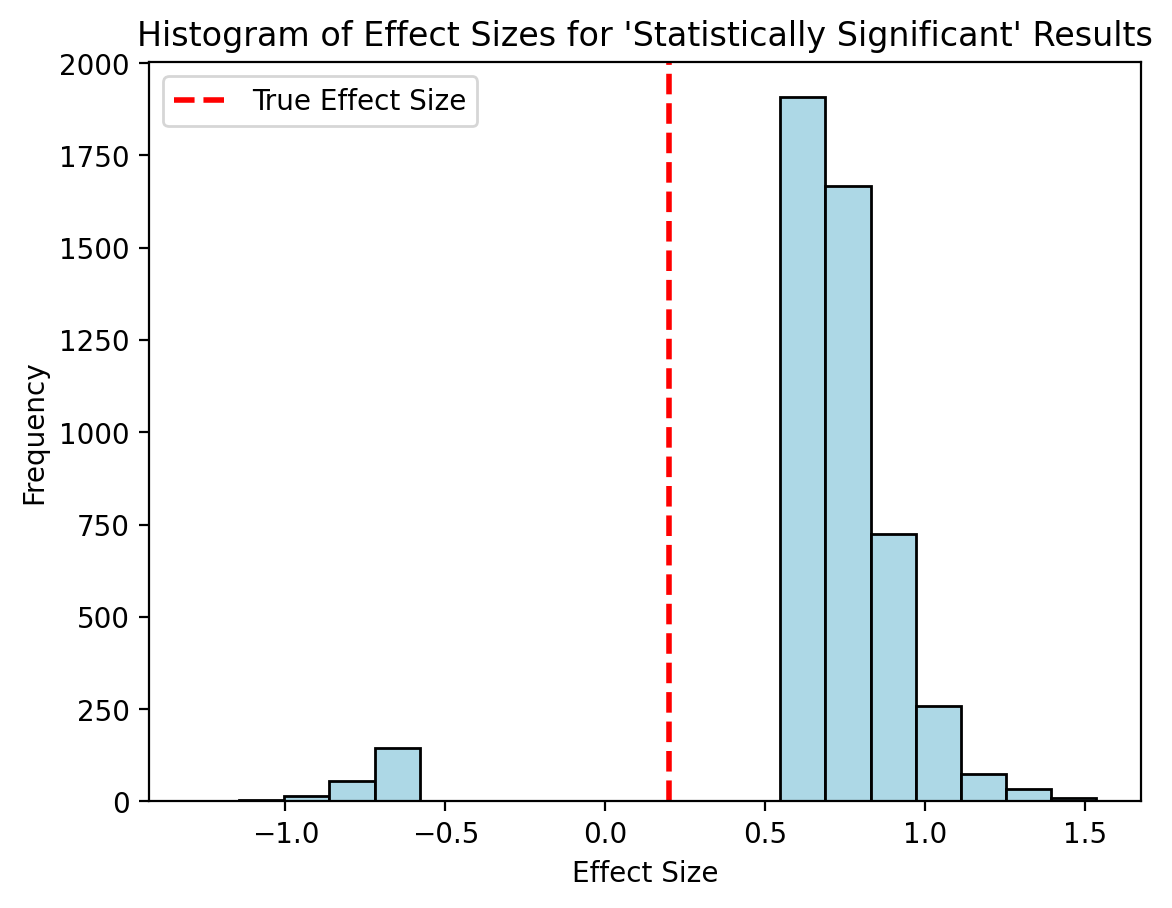

In [6]:
plt.hist(res, bins=20, color="lightblue", edgecolor="black")
plt.axvline(
    x=0.2, color="red", linestyle="dashed", linewidth=2, label="True Effect Size"
)
plt.xlabel("Effect Size")
plt.ylabel("Frequency")
plt.title("Histogram of Effect Sizes for 'Statistically Significant' Results")
plt.legend()
plt.show()

In [7]:
%load_ext watermark
%watermark -n -u -v -iv -w 

Last updated: Sun Sep 17 2023

Python implementation: CPython
Python version       : 3.11.5
IPython version      : 8.15.0

scipy     : 1.10.1
arviz     : 0.16.0
matplotlib: 3.7.2
numpy     : 1.25.2

Watermark: 2.4.3

